In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')



In [29]:
# loading the data set
df = pd.read_csv("student_performance.csv")
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [30]:
df.shape

(10, 9)

In [31]:
df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 848.0+ bytes


In [32]:
# cheaking null values
df.isnull().sum()

StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
dtype: int64

In [33]:
# cheacking duplicate values
df.duplicated().sum()

0

There is no null values and duplicate values


In [34]:
df.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,85.600000,17.700000,78.100000,1.500000,80.200000
std,3.02765,7.441625,6.848357,10.170218,1.080123,10.097304
min,1.00000,70.000000,8.000000,60.000000,0.000000,62.000000
25%,3.25000,82.750000,12.750000,71.750000,1.000000,73.500000
50%,5.50000,86.500000,17.500000,80.000000,1.500000,82.500000
75%,7.75000,90.750000,21.500000,85.750000,2.000000,87.750000
max,10.00000,95.000000,30.000000,90.000000,3.000000,92.000000


In [35]:

df.columns

Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

In [36]:
df['FinalGrade']

0    80
1    87
2    68
3    92
4    85
5    90
6    62
7    78
8    72
9    88
Name: FinalGrade, dtype: int64

In [37]:
# crating a perforamnce column in high medium low based on final grade
def map_performance(score):
    if score >= 75:
        return 'High'
    elif score >= 50:
        return 'Medium'
    else:
        return 'Low'

df['Performance'] = df['FinalGrade'].apply(map_performance)


Text(0.5, 1.0, 'Gender Distribution')

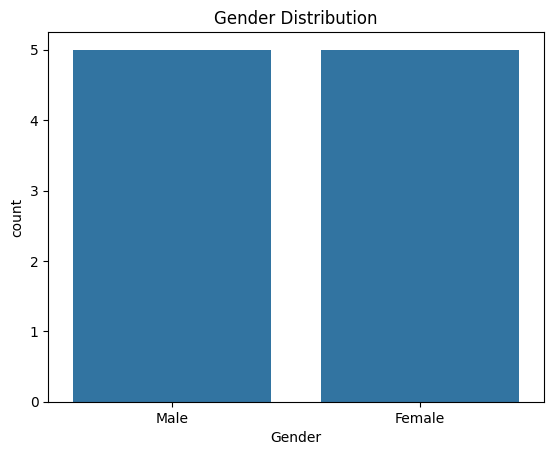

In [38]:
# eda 
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')


Text(0.5, 1.0, 'Parental Support')

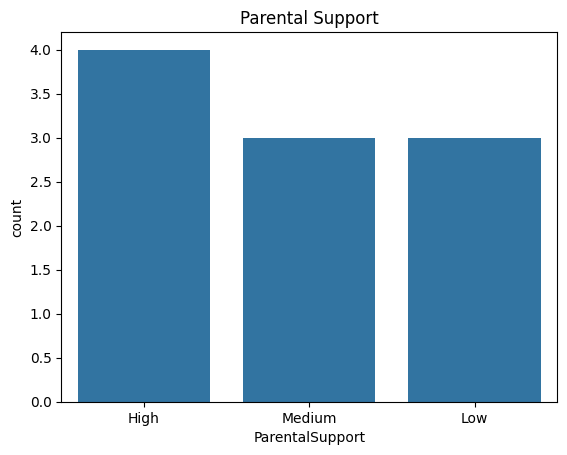

In [39]:
sns.countplot(x='ParentalSupport', data=df)
plt.title('Parental Support')


Text(0.5, 1.0, 'Extracurricular Activities')

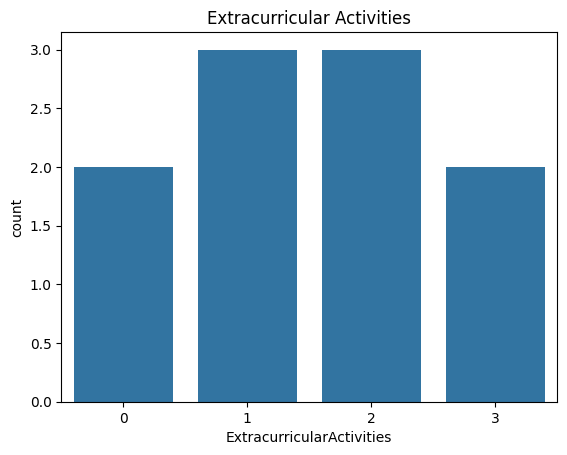

In [40]:
sns.countplot(x='ExtracurricularActivities', data=df)
plt.title('Extracurricular Activities')


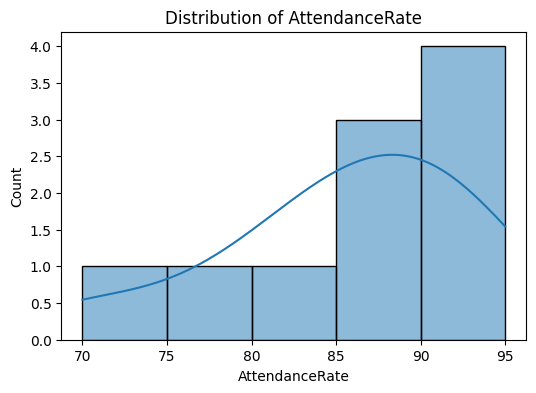

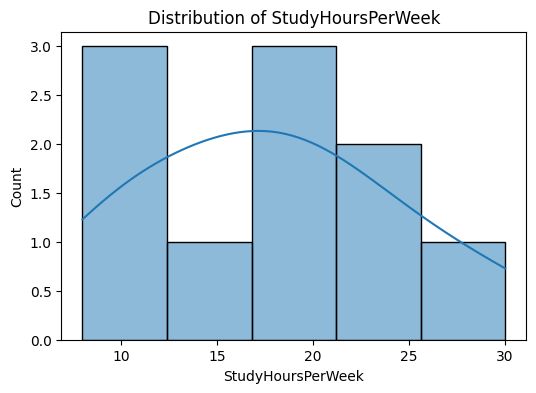

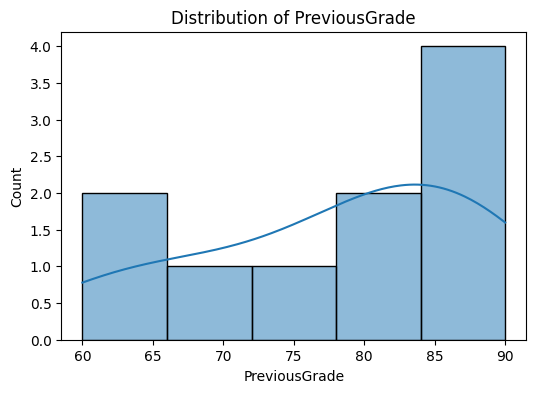

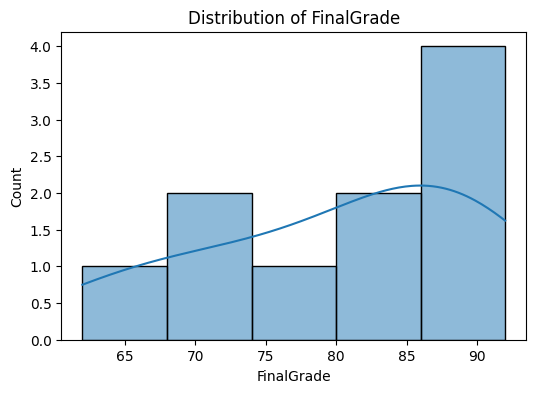

In [41]:
# numerical feature distribution 
numerical_cols = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'FinalGrade']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [42]:
df['Performance'].value_counts()

Performance
High      7
Medium    3
Name: count, dtype: int64

Text(0.5, 1.0, 'Performance Distribution')

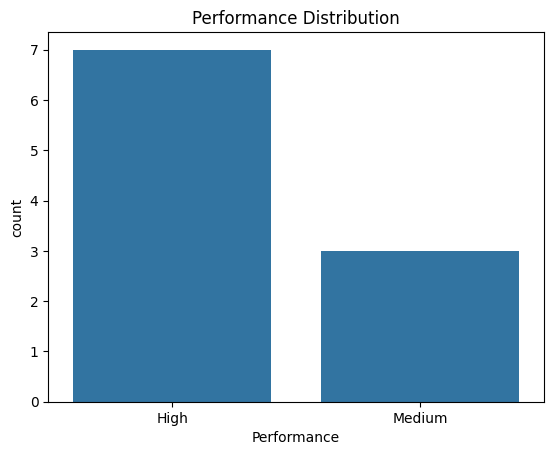

In [43]:
sns.countplot(x='Performance', data=df)
plt.title('Performance Distribution')


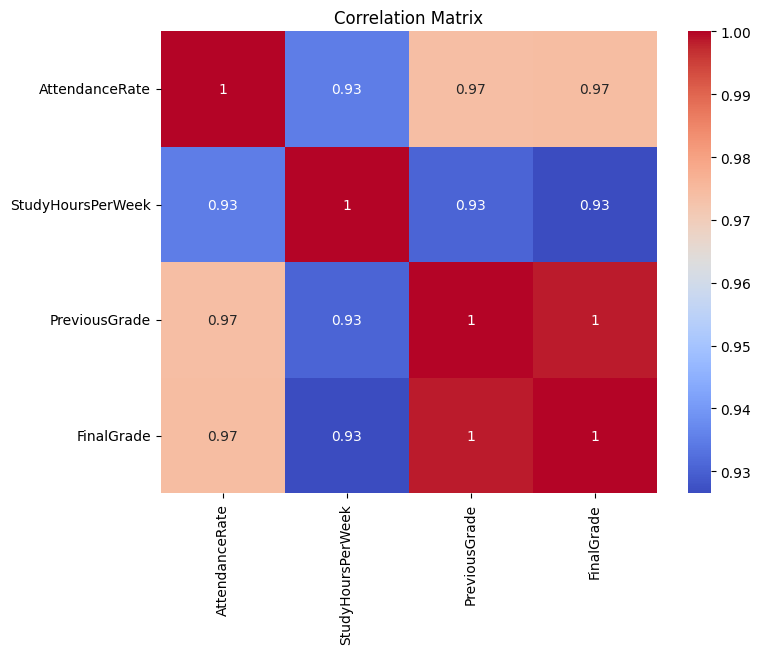

In [44]:
# correlation metrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


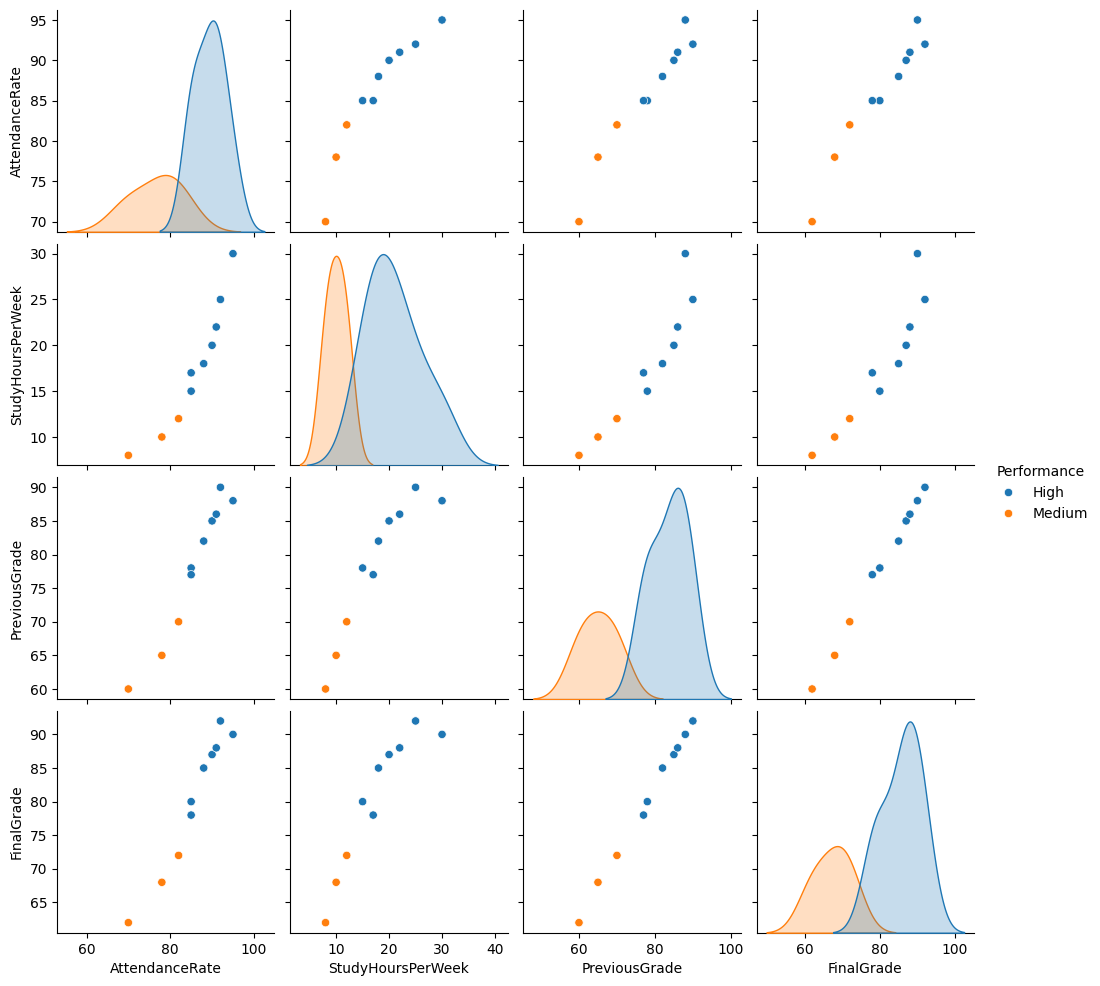

In [45]:
# pair plot of performance
sns.pairplot(df[numerical_cols + ['Performance']], hue='Performance')



In [46]:
# droping the unecesarry clumns
df.drop(['StudentID', 'Name'], axis=1, inplace=True)


# label encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['ParentalSupport'] = le.fit_transform(df['ParentalSupport'])
df['ExtracurricularActivities'] = le.fit_transform(df['ExtracurricularActivities'])
df['Performance'] = le.fit_transform(df['Performance'])  # Only if it's your target variable



# Train Test Split

training the ml model 

In [48]:
from sklearn.model_selection import train_test_split

X = df.drop('Performance', axis=1)
y = df['Performance']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [49]:
# random forest ml model 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
[[2 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [50]:
# logistic regression 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 1.0
[[2 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



model evaluation

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

# For Random Forest
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# For Logistic Regression
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Random Forest Results:
[[2 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Logistic Regression Results:
[[2 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



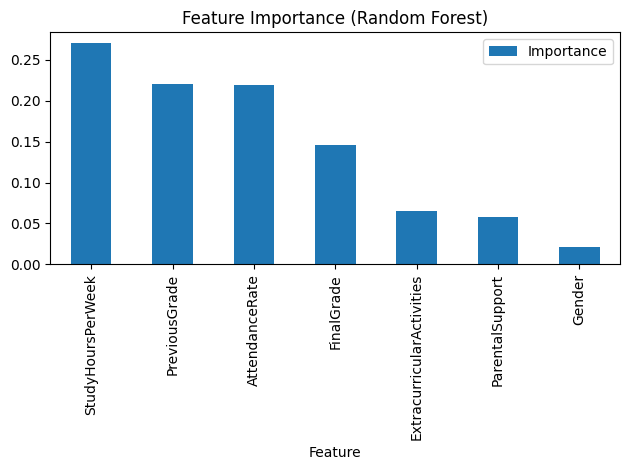

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False).plot.bar(x='Feature', y='Importance', title='Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


In [53]:
# saving the the best model 
import joblib
joblib.dump(rf, 'student_performance_model.pkl')


['student_performance_model.pkl']